## Creating ML Environment

In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.9.1
numpy: 1.21.5
matplotlib: 3.5.3
pandas: 1.4.4
statsmodels: 0.13.2
sklearn: 1.0.2


## Importing Libraries


In [2]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import calendar
import warnings
import datetime
import seaborn as sns
from datetime import date
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings('ignore')
import shutil
import os
import time

In [3]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...

Ellipsis

In [4]:
#Provide Start Date and End Date for the Data Processing
# Note : Start Date should be less than the end data
Start_D = input('Provide Start Date in format (YYYY-MM-DD):')
End_D = input('Provide End Date in format (YYYY-MM-DD):')
Today = input('Provide  Audit Date in format (YYYY-MM-DD):')

Provide Start Date in format (YYYY-MM-DD):2023-02-01
Provide End Date in format (YYYY-MM-DD):2023-02-28
Provide  Audit Date in format (YYYY-MM-DD):2023-03-04


In [5]:
#Select the Year for which you want to observe the data
#Option
print("Select the option --> Year(YYYY) in range between 2021-2029")
while True:
    try:
        year = input('Year(YYYY): ')
        if not re.match("^202[1-9]$", year):
            raise ValueError   
        break
    except ValueError:
            print('Error! Only provide in Year Format yyyy in range between 2021-2029')

Select the option --> Year(YYYY) in range between 2021-2029
Year(YYYY): 2023


In [6]:
# creating an empty list
month = []
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

while True:
    try:
        n = int(input("Enter number of Months in Integer (1 or 2): "))
        if n < 1 or n > 2:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print('Please enter an integer 1 or 2')
        
# iterating till the range
print("Month in format Mmm")
print("For example January as Jan")
for i in range(0, n):
    while True:
        try:
            ele = input("Month-{} in format Mmm: ".format(i+1))
            #if not re.match("^[A-Z][a-z][a-z]$", ele):
            #    raise ValueError
            if ele not in months:
                raise ValueError
            break
        except ValueError:
            print('Error! Only provide in Month Format Mmm!')
    month.append(ele) # adding the element
print(month)

Enter number of Months in Integer (1 or 2): 1
Month in format Mmm
For example January as Jan
Month-1 in format Mmm: Feb
['Feb']


In [7]:
file_list = []

for i in range(len(month)):
    file_list.append("Weekly-Monthly-KPI-{}-{}.xlsx".format(month[i],year))
print("File List:")
for j in range(len(file_list)):
    print(file_list[j])

File List:
Weekly-Monthly-KPI-Feb-2023.xlsx


In [8]:
finalDF = pd.DataFrame()

for file in file_list:
    sheets = pd.ExcelFile(""+file)
    myWorkSheets = sheets.sheet_names
    for sheet in myWorkSheets:
        if sheet.startswith("Pager") or sheet.startswith("BigPanda"):
            df = pd.read_excel(""+file,sheet_name=sheet)
            finalDF = finalDF.append(df)

In [9]:
df11 = finalDF.copy()

In [10]:
df11 = df11.drop(['BigPanda Incident Link','Jira Ticket Updated'], axis = 1)

In [11]:
df11.columns = ['Jira Ticket','Subject','Product','Location','Priority','Customer Impacted','Date Time','Incident End','First Assignment','Actioned Time', 'Ticket created on','TTD','TTE','TTAE','TTA','TTR','Assignee','NAR','RNE','ETS','TSG','RCA','Total Alerts','Incident Start time',
       'Escalated Time']

In [12]:
df11['Date Time'] = pd.to_datetime(df11['Date Time'])
df11['Date'] = df11['Date Time'].dt.strftime('%m-%d-%Y')
df11['Date'] = pd.to_datetime(df11['Date'])
df11['Month'] = pd.DatetimeIndex(df11['Date Time']).month
df11['Day'] = pd.DatetimeIndex(df11['Date Time']).day
df11['Year'] = pd.DatetimeIndex(df11['Date Time']).year
df11['Quarter'] = pd.DatetimeIndex(df11['Date Time']).quarter
df11['Week'] = pd.DatetimeIndex(df11['Date Time']).week
df11['Weekday'] = pd.DatetimeIndex(df11['Date Time']).weekday
df11['Weekday'] = df11['Weekday'].apply(lambda x: calendar.day_name[x])
df11['Dayofyear'] = pd.DatetimeIndex(df11['Date Time']).dayofyear
df11['Weekofyear'] = pd.DatetimeIndex(df11['Date Time']).weekofyear
df11['date_ordinal'] = pd.to_datetime(df11['Date Time']).apply(lambda date: date.toordinal())
df11['Hours'] = df11['Date Time'].dt.hour

In [13]:
df11['TSG'] = df11['TSG'].apply(lambda name : name.upper())
df11['Product'] = df11['Product'].apply(lambda name : name.upper())
df11['Location'] = df11['Location'].apply(lambda name : name.upper())
#df11['Assignee'] = df11['Assignee'].apply(lambda name : name.upper())
df11['Weekday'] = df11['Weekday'].apply(lambda name : name.upper())
df11['NAR'] = df11['NAR'].apply(lambda name : name.upper())
df11['RNE'] = df11['RNE'].apply(lambda name : name.upper())
df11['ETS'] = df11['ETS'].apply(lambda name : name.upper())

In [14]:
df11.Product = df11.Product.str.replace(" ","")
df11.Priority = df11.Priority.str.replace(" ","")
df11.Location = df11.Location.str.replace(" ","")
df11.TSG = df11.TSG.str.replace(" ","")
df11['Jira Ticket'] = df11['Jira Ticket'].str.strip()
df11['Subject'] = df11['Subject'].str.strip()
df11['Customer Impacted'] = df11['Customer Impacted'].str.strip()
df11['RCA'] = df11['RCA'].str.strip()
df11['NAR'] = df11['NAR'].str.strip()
df11['RNE'] = df11['RNE'].str.strip()
df11['ETS'] = df11['ETS'].str.strip()

In [15]:
df11.Product = df11.Product.str.replace("NILE","API")
df11.Product = df11.Product.str.replace("UAM","CAMS")

In [16]:
df11['NAR'] = df11['NAR'].replace({'NO': 0, 'YES': 1})
df11['RNE'] = df11['RNE'].replace({'NO': 0, 'YES': 1})
df11['ETS'] = df11['ETS'].replace({'NO': 0, 'YES': 1})
#df11['TSG'] = df11['TSG'].replace({'NO': 0, 'YES': 1})
df11['TSG'] = df11['TSG'].replace({'NO,YES':'YES', 'YES,NO':'NO'})

In [17]:
df11['Priority'] = pd.Categorical(df11['Priority'])
df11['Product'] = pd.Categorical(df11['Product'])
df11['Location'] = pd.Categorical(df11['Location'])
df11['Assignee'] = pd.Categorical(df11['Assignee'])

In [18]:
product_color = {'UDP': 'C0',
 'CLARITY': 'C1',
 'API': 'C2',
 'DEVOPS': 'C3',
 'SHARE': 'C4',
 'CAMS': 'C5',
 'ARTIFACTORY' : 'C6',
 'COEUS':'C7',
 'JIRA': 'C10',
 'UDP2': 'C11',
 'PKI': 'C13',
 'INQUISITO': 'C14'}

products = list(df11.Product.unique())
for product in products:
    # solve
    product = product.split(',')
final_product = products + product
final_product1 = list(set(final_product))


# initializing remove list
product_list = ['INQUISITO','DEVOPS','CAMS','API','PKI','UDP','CLARITY','UDP2','DAP']
 
# printing original list
print ("The available list is : " + str(final_product1))
 
# printing remove list
print ("The original list is : " + str(product_list))
 
# using list comprehension to perform task
res1 = [i for i in final_product1 if i not in product_list]
res2 = [i for i in final_product1 if i in product_list] 
# printing result
print ("The list after performing remove operation is : " + str(res1))

string = "C"
list1 = res1
list2 = list(range(15,15+len(list1)))
list2 = list(map(lambda orig_string: string + str(orig_string), list2))
list2

# Printing original keys-value lists
print("Original key list is : " + str(list1))
print("Original value list is : " + str(list2))
 
# using naive method
# to convert lists to dictionary
res = {}
for key in list1:
    for value in list2:
        res[key] = value
        list2.remove(value)
        break
 
# Printing resultant dictionary
print("Resultant dictionary is : " + str(res))

def Merge(dict1, dict2):
    return(dict2.update(dict1))

# This will return None
print(Merge(res, product_color))
 
# changes made in product_color    
print(product_color)


The available list is : ['CLARITY', 'CAMS', 'DEVOPS', 'UDP', 'UDP,API', 'INQUISITO', 'UDP2', 'UDP,API,CLARITY', 'API', 'PKI', 'UDP,UDP2']
The original list is : ['INQUISITO', 'DEVOPS', 'CAMS', 'API', 'PKI', 'UDP', 'CLARITY', 'UDP2', 'DAP']
The list after performing remove operation is : ['UDP,API', 'UDP,API,CLARITY', 'UDP,UDP2']
Original key list is : ['UDP,API', 'UDP,API,CLARITY', 'UDP,UDP2']
Original value list is : ['C15', 'C16', 'C17']
Resultant dictionary is : {'UDP,API': 'C15', 'UDP,API,CLARITY': 'C16', 'UDP,UDP2': 'C17'}
None
{'UDP': 'C0', 'CLARITY': 'C1', 'API': 'C2', 'DEVOPS': 'C3', 'SHARE': 'C4', 'CAMS': 'C5', 'ARTIFACTORY': 'C6', 'COEUS': 'C7', 'JIRA': 'C10', 'UDP2': 'C11', 'PKI': 'C13', 'INQUISITO': 'C14', 'UDP,API': 'C15', 'UDP,API,CLARITY': 'C16', 'UDP,UDP2': 'C17'}


In [19]:
priority_color = {'P4': 'C2','P3': 'C0','P2': 'C1','P1': 'C3' }

In [20]:
sort_day = ['Friday', 'Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
sort_hour = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
sort_date = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

In [21]:
df11['TTAES'] = df11[['TTA','TTAE']].min(axis=1)
df11['TTAES'] = df11['TTAES'].fillna(0)
df11['TTAES'] = df11['TTAES'].apply(np.int64)

In [22]:
if Start_D == "":
    Start_D = df11.iloc[1,25].strftime('%Y-%m-%d')
    print("Start Date :",Start_D)
else:
    print("Start Date has been already entered")
if End_D == "":
    End_D = df11.iloc[-1,25].strftime('%Y-%m-%d')
    print("End Date :",End_D)
else:
    print("End Date has been already entered")

Start Date has been already entered
End Date has been already entered


In [23]:
df11

,Jira Ticket,Subject,Product,Location,Priority,Customer Impacted,Date Time,Incident End,First Assignment,Actioned Time,...,Day,Year,Quarter,Week,Weekday,Dayofyear,Weekofyear,date_ordinal,Hours,TTAES
0,INC-3092,UDP2 Prod US: NGINX Ingress High 502 Counts,UDP2,US,P4,No Customer Impact,2023-02-01 00:17:00,2023-02-01 00:26:00,2023-02-01 00:18:00,NaT,...,1,2023,1,5,WEDNESDAY,32,5,738552,0,0
1,INC-3093,Clarity Prod US: CRITICAL - P4 - 0.5% Subjects...,CLARITY,US,P4,16 users(0.84% impacted),2023-02-01 02:01:00,2023-02-01 03:54:00,2023-02-01 02:01:00,NaT,...,1,2023,1,5,WEDNESDAY,32,5,738552,2,0
2,INC-3094,UDP2 Prod US: Critical - Push - Number of Runn...,UDP2,US,P4,No Customer Impact,2023-02-01 02:05:00,2023-02-01 02:34:00,2023-02-01 02:05:00,NaT,...,1,2023,1,5,WEDNESDAY,32,5,738552,2,0
3,INC-3097,UDP2 Prod US: Critical - Follow - Unable to Ac...,UDP2,US,P4,No Customer Impact,2023-02-01 11:41:00,2023-02-01 11:53:00,2023-02-01 11:41:00,NaT,...,1,2023,1,5,WEDNESDAY,32,5,738552,11,0
4,INC-3100,[Synthetics] Inquisito Prod EU: Api Health,INQUISITO,EU,P4,No Customer Impact,2023-02-01 12:20:00,2023-02-01 17:06:00,2023-02-01 12:20:00,NaT,...,1,2023,1,5,WEDNESDAY,32,5,738552,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,INC-3394,UDP2 Prod EU: NGINX Ingress High 504 Counts,UDP2,EU,P4,No Customer Impact,2023-02-28 04:40:00,2023-02-28 04:43:00,2023-02-28 04:41:00,NaN,...,28,2023,1,9,TUESDAY,59,9,738579,4,0
231,INC-3395,UDP2 Prod EU: Cloudflare 403 Count Above Thres...,UDP2,EU,P4,No Customer Impact,2023-02-28 10:15:00,2023-02-28 12:56:00,2023-02-28 10:15:00,NaN,...,28,2023,1,9,TUESDAY,59,9,738579,10,0
232,INC-3398,UDP2 Prod EU: Cloudflare 403 Count Above Thres...,UDP2,EU,P4,No Customer Impact,2023-02-28 13:47:00,2023-02-28 15:06:00,2023-02-28 13:47:00,NaN,...,28,2023,1,9,TUESDAY,59,9,738579,13,0
233,INC-3402,UDP2 Prod EU: Cloudflare 403 Count Above Thres...,UDP2,EU,P4,No Customer Impact,2023-02-28 21:59:00,2023-02-28 22:02:00,2023-02-28 21:59:00,NaN,...,28,2023,1,9,TUESDAY,59,9,738579,21,0


In [24]:
df11.columns

Index(['Jira Ticket', 'Subject', 'Product', 'Location', 'Priority',
       'Customer Impacted', 'Date Time', 'Incident End', 'First Assignment',
       'Actioned Time', 'Ticket created on', 'TTD', 'TTE', 'TTAE', 'TTA',
       'TTR', 'Assignee', 'NAR', 'RNE', 'ETS', 'TSG', 'RCA', 'Total Alerts',
       'Incident Start time', 'Escalated Time', 'Date', 'Month', 'Day', 'Year',
       'Quarter', 'Week', 'Weekday', 'Dayofyear', 'Weekofyear', 'date_ordinal',
       'Hours', 'TTAES'],
      dtype='object')

In [25]:
dataset = df11.drop(['Subject', 'Customer Impacted', 'Incident End', 'First Assignment', 'Actioned Time', 'Ticket created on', 'TTD', 'TTE', 'TTAE', 'TTA',
       'TTR','NAR', 'RNE', 'ETS','RCA', 'Total Alerts',
       'Incident Start time', 'Escalated Time', 'Date', 'Month', 'Day', 'Year',
       'Quarter', 'Week', 'Weekday', 'Dayofyear', 'Weekofyear', 'date_ordinal',
       'Hours', 'TTAES','Date Time','Location','Product'  ], axis = 1)

In [26]:
print(dataset.shape)

(312, 4)


In [27]:
print(dataset.describe())

       Jira Ticket Priority         Assignee  TSG
count          312      312              308  312
unique         286        3               16    2
top       INC-3299       P4  Atharva Jagdale  YES
freq             5      308               59  170


In [28]:
print(dataset.groupby('Assignee').size())

Assignee
 Nitesh Kumar      11
Ankit Singh        26
Atharva Jagdale    59
Bhavya Parikh       3
Bhavya Parkih       1
Jainil Lalaji      17
Nitesh kumar        3
Pavan K            46
Sahana A            6
Sathya A           36
Shadab Tamboli     37
Smruti Sakhare     20
Smruti Sakhare      1
Sutheshna Raman    11
Varsha Rana        20
                   11
dtype: int64


In [29]:
#print(dataset.groupby('Product').size())

In [30]:
print(dataset.groupby('TSG').size())

TSG
NO     142
YES    170
dtype: int64


In [31]:
print(dataset.groupby('Priority').size())

Priority
P2      1
P3      3
P4    308
dtype: int64


# Histogram to get more insight on incident data

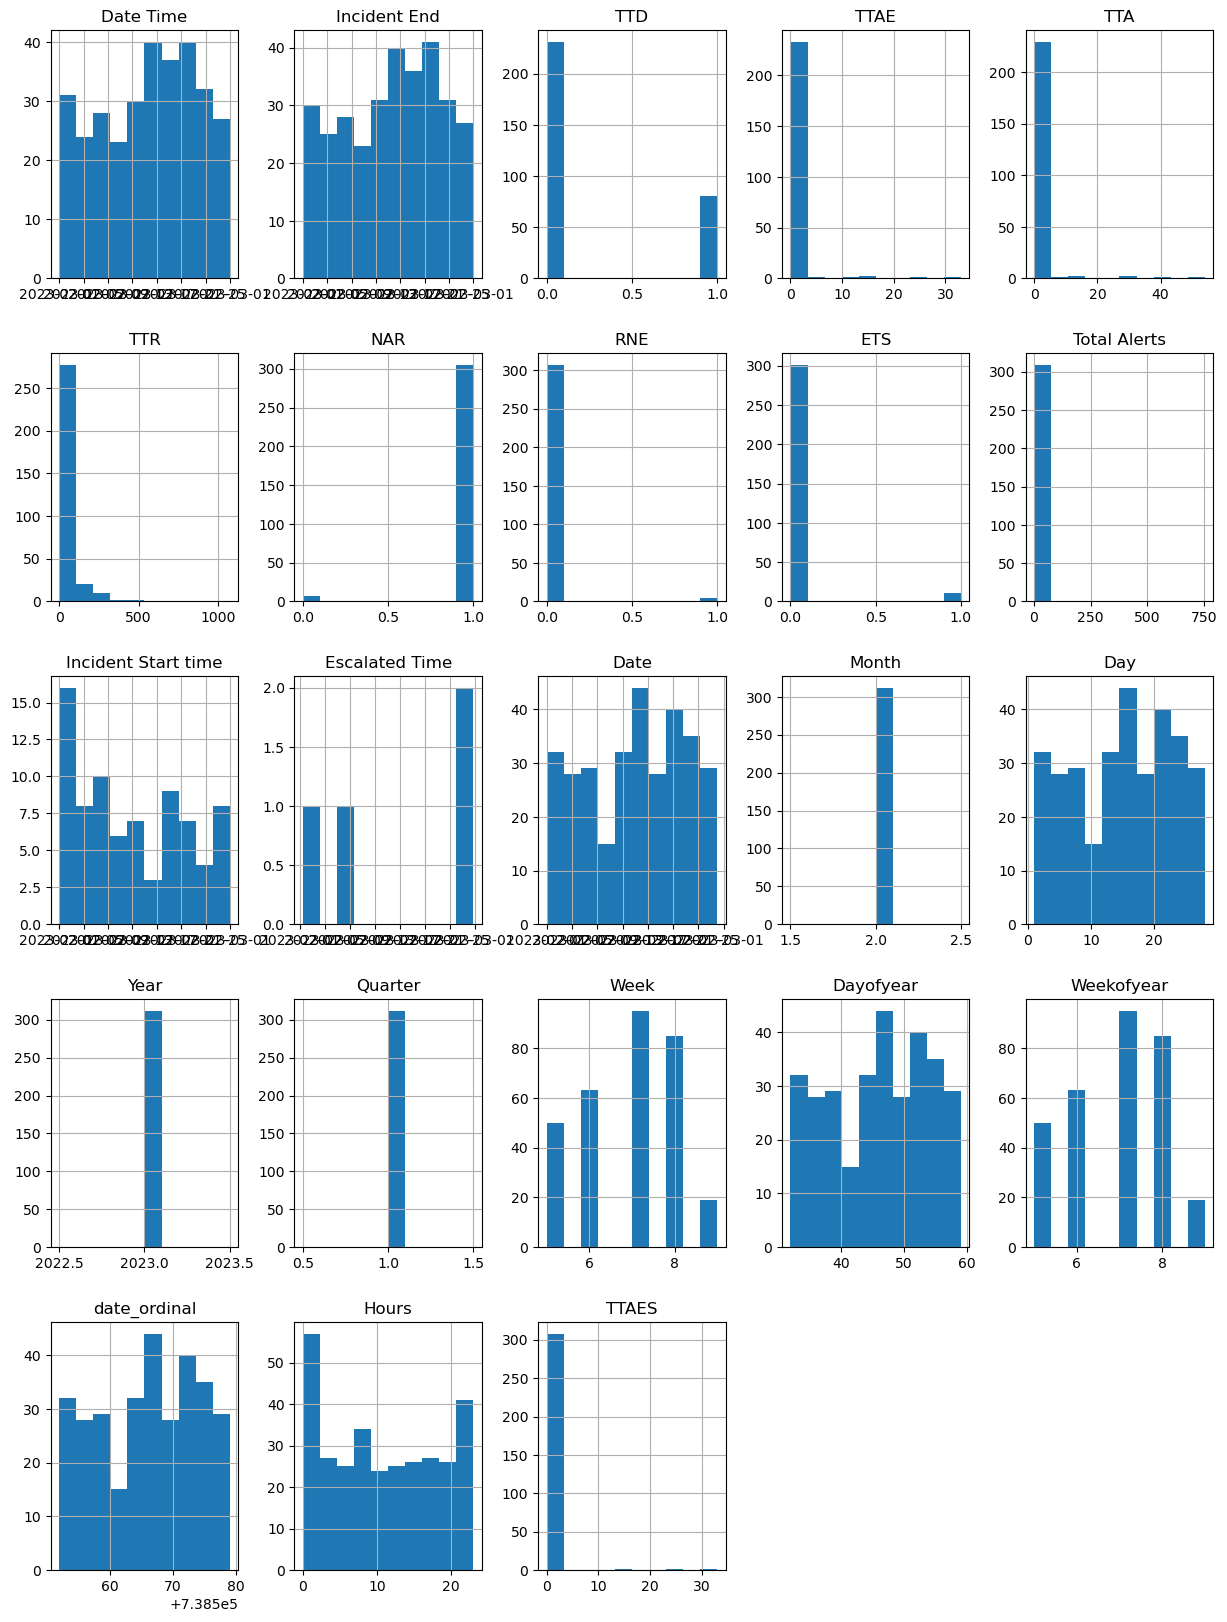

In [32]:
df11.hist(figsize = (15,20))
pyplot.show()


# Box plot (Helps us to look into outliers)

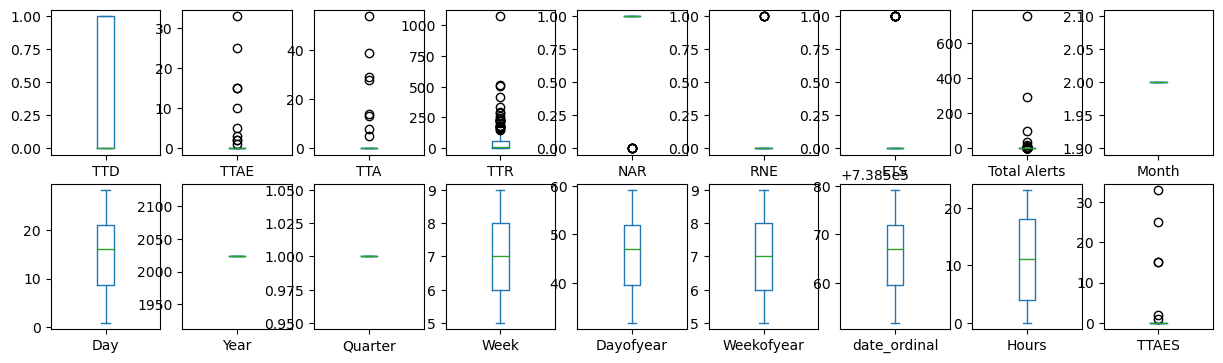

In [33]:
df11.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False, figsize = (15,20))
pyplot.show()

In [34]:
 dataset.head()

,Jira Ticket,Priority,Assignee,TSG
0,INC-3092,P4,Shadab Tamboli,YES
1,INC-3093,P4,Sathya A,YES
2,INC-3094,P4,Sathya A,NO
3,INC-3097,P4,Atharva Jagdale,NO
4,INC-3100,P4,Atharva Jagdale,YES


In [35]:
dataset.columns

Index(['Jira Ticket', 'Priority', 'Assignee', 'TSG'], dtype='object')

In [36]:
dataset['TSG']


0      YES
1      YES
2       NO
3       NO
4      YES
      ... 
230    YES
231     NO
232     NO
233     NO
234    YES
Name: TSG, Length: 312, dtype: object

In [37]:
#dataset['TSG'].astype(str).astype(int)

In [38]:
#for Priority in dataset:
    #print(dataset[Priority])

In [39]:
dataset['Priority'] = dataset['Priority'].replace(['P4'], '4')
dataset['Priority'] = dataset['Priority'].replace(['P3'], '3')
dataset['Priority'] = dataset['Priority'].replace(['P2'], '2')
dataset['Priority'] = dataset['Priority'].replace(['P1'], '1')

In [40]:
dataset['Priority'].astype(str).astype(int)

0      4
1      4
2      4
3      4
4      4
      ..
230    4
231    4
232    4
233    4
234    4
Name: Priority, Length: 312, dtype: int32

In [41]:
print(dataset.groupby('Priority').size())

Priority
2      1
3      3
4    308
dtype: int64


In [42]:
dataset.groupby(['Priority','TSG']).apply(lambda x: x.sample(n=80, replace= True))


Jira Ticket Priority         Assignee  TSG
Priority TSG                                               
2        YES 76     INC-3399        2  Smruti Sakhare   YES
             76     INC-3399        2  Smruti Sakhare   YES
             76     INC-3399        2  Smruti Sakhare   YES
             76     INC-3399        2  Smruti Sakhare   YES
             76     INC-3399        2  Smruti Sakhare   YES
...                      ...      ...              ...  ...
4        YES 100    INC-3237        4     Nitesh Kumar  YES
             0      INC-3092        4   Shadab Tamboli  YES
             47     INC-3167        4                   YES
             218    INC-3377        4          Pavan K  YES
             8      INC-3106        4   Shadab Tamboli  YES

[400 rows x 4 columns]

In [43]:
pwpa=dataset.groupby(['Priority']).sample(n=80, replace=True)

In [44]:
pwpa

,Jira Ticket,Priority,Assignee,TSG
76,INC-3399,2,Smruti Sakhare,YES
76,INC-3399,2,Smruti Sakhare,YES
76,INC-3399,2,Smruti Sakhare,YES
76,INC-3399,2,Smruti Sakhare,YES
76,INC-3399,2,Smruti Sakhare,YES
...,...,...,...,...
0,INC-3095,4,Jainil Lalaji,YES
225,INC-3387,4,Sathya A,YES
151,INC-3299,4,Shadab Tamboli,YES
11,INC-3116,4,Sutheshna Raman,YES


In [45]:
pwpa_final = pwpa.drop_duplicates()

In [46]:
#Changing the column data as per our requirement 

pwpa_final['Priority'] = pwpa_final['Priority'].replace(['4'], 'Low')
pwpa_final['Priority'] = pwpa_final['Priority'].replace(['3'], 'Medium')
pwpa_final['Priority'] = pwpa_final['Priority'].replace(['2'], 'High')
pwpa_final['Priority'] = pwpa_final['Priority'].replace(['1'], 'Critical')


In [47]:
pwpa_final

,Jira Ticket,Priority,Assignee,TSG
76,INC-3399,High,Smruti Sakhare,YES
49,INC-3264,Meduim,Varsha Rana,YES
84,INC-3226,Meduim,Bhavya Parikh,YES
74,INC-3401,Meduim,Shadab Tamboli,NO
73,INC-3211,Low,Pavan K,NO
...,...,...,...,...
150,INC-3299,Low,Shadab Tamboli,NO
0,INC-3095,Low,Jainil Lalaji,YES
225,INC-3387,Low,Sathya A,YES
11,INC-3116,Low,Sutheshna Raman,YES


In [48]:
PWPA_FINAL = pwpa_final.dropna(axis=0)
#print(PWPA_FINAL)

In [49]:
PWPA_FINAL.rename(columns={'Jira Ticket': 'Ticket', 'Assignee': 'Auditee', 'Priority':'Ticket Severity'}, inplace=True)

In [50]:
# Creating empty columns
PWPA_FINAL.insert(2,"Audited By", " ")
PWPA_FINAL.insert(3,"Audit Date", " ")

In [51]:
#Filling the empty columns with required data
PWPA_FINAL.loc[:,'Audited By'] = 'Bhavya Parikh'
PWPA_FINAL.loc[:,'Audit Date'] = Today


In [52]:
 PWPA_FINAL['Audit Date'].astype('str')


76     2023-03-04
49     2023-03-04
84     2023-03-04
74     2023-03-04
73     2023-03-04
          ...    
150    2023-03-04
0      2023-03-04
225    2023-03-04
11     2023-03-04
115    2023-03-04
Name: Audit Date, Length: 71, dtype: object

In [53]:
fresult = PWPA_FINAL[['Ticket', 'Auditee', 'Audited By', 'Audit Date', 'Ticket Severity','TSG']]

In [54]:
fresult

,Ticket,Auditee,Audited By,Audit Date,Ticket Severity,TSG
76,INC-3399,Smruti Sakhare,Bhavya Parikh,2023-03-04,High,YES
49,INC-3264,Varsha Rana,Bhavya Parikh,2023-03-04,Meduim,YES
84,INC-3226,Bhavya Parikh,Bhavya Parikh,2023-03-04,Meduim,YES
74,INC-3401,Shadab Tamboli,Bhavya Parikh,2023-03-04,Meduim,NO
73,INC-3211,Pavan K,Bhavya Parikh,2023-03-04,Low,NO
...,...,...,...,...,...,...
150,INC-3299,Shadab Tamboli,Bhavya Parikh,2023-03-04,Low,NO
0,INC-3095,Jainil Lalaji,Bhavya Parikh,2023-03-04,Low,YES
225,INC-3387,Sathya A,Bhavya Parikh,2023-03-04,Low,YES
11,INC-3116,Sutheshna Raman,Bhavya Parikh,2023-03-04,Low,YES


In [55]:
#Taking transpose of the dataframe
result = fresult.transpose()

In [56]:
result

,76,49,84,74,73,39,2,203,2,149,...,92,67,233,116,29,150,0,225,11,115
Ticket,INC-3399,INC-3264,INC-3226,INC-3401,INC-3211,INC-3198,INC-1599,INC-3361,INC-3094,INC-3299,...,INC-3230,INC-3358,INC-3402,INC-3254,INC-3159,INC-3299,INC-3095,INC-3387,INC-3116,INC-3253
Auditee,Smruti Sakhare,Varsha Rana,Bhavya Parikh,Shadab Tamboli,Pavan K,Ankit Singh,Atharva Jagdale,Ankit Singh,Sathya A,Shadab Tamboli,...,Pavan K,Ankit Singh,Sathya A,Sahana A,Sathya A,Shadab Tamboli,Jainil Lalaji,Sathya A,Sutheshna Raman,Sathya A
Audited By,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,...,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh,Bhavya Parikh
Audit Date,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,...,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04
Ticket Severity,High,Meduim,Meduim,Meduim,Low,Low,Low,Low,Low,Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
TSG,YES,YES,YES,NO,NO,NO,YES,YES,NO,YES,...,NO,YES,NO,NO,YES,NO,YES,YES,YES,YES


In [57]:
result.to_csv('PWPA_OUTPUT.csv', index=False)